In [1]:
# carregando os pacotes e removendo os avisos
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Carregando o dataset
df = pd.read_csv('scripts_python/BD_modelo.csv', sep = ';')
df.head()

,age,workclass.Local.gov,workclass.Private,workclass.Self.emp.inc,workclass.Self.emp.not.inc,workclass.State.gov,workclass.Without.pay,fnlwgt,education.11th,education.12th,...,native.country.Puerto.Rico,native.country.Scotland,native.country.South,native.country.Taiwan,native.country.Thailand,native.country.Trinadad.Tobago,native.country.United.States,native.country.Vietnam,native.country.Yugoslavia,income
0,39,0,0,0,0,1,0,77516,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,0,0,0,1,0,0,83311,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,0,1,0,0,0,0,215646,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,1,0,0,0,0,234721,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,0,1,0,0,0,0,338409,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(46033, 97)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.dtypes

age                               int64
workclass.Local.gov               int64
workclass.Private                 int64
workclass.Self.emp.inc            int64
workclass.Self.emp.not.inc        int64
                                  ...  
native.country.Trinadad.Tobago    int64
native.country.United.States      int64
native.country.Vietnam            int64
native.country.Yugoslavia         int64
income                            int64
Length: 97, dtype: object

O total de registros é: 46033
A classe 1 possui 11422 que representa 24.8 %
A classe 2 possui: 34611 que representa 75.2 %


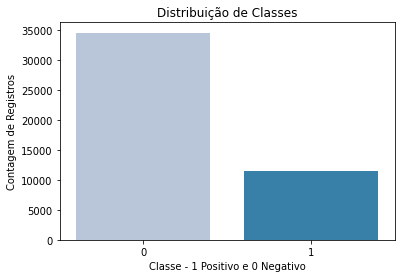

In [6]:
graf_class = sns.countplot(x = 'income', data = df, palette = 'PuBu')
graf_class.set_xlabel('Classe - 1 Positivo e 0 Negativo')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição de Classes')

class_table = df['income'].value_counts()

print('O total de registros é:', class_table.sum())
print('A classe 1 possui', class_table[1].sum(), 'que representa', round((class_table[1]/class_table.sum())*100,1),"%")
print('A classe 2 possui:', class_table[0].sum(), 'que representa', round((class_table[0]/class_table.sum())*100,1),"%")

In [7]:
# Balanceamento de Classes

# Divisão de x e y para o SMOTE
x = df.iloc[:, 0:96]
y = df.iloc[:, 96]

# Cria o balanceador SMOTE
smote_bal = SMOTE()

# Aplica o balanceador SMOTE
x_res, y_res = smote_bal.fit_resample(x, y)

O total de registros é: 69222
A classe 1 possui 34611 que representa 50.0 %
A classe 2 possui: 34611 que representa 50.0 %


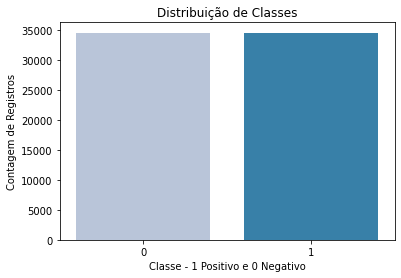

In [8]:
# Classes foram balanceadas conforme o gráfico abaixo.

graf_class2 = sns.countplot(y_res, palette = 'PuBu')
graf_class2.set_xlabel('Classe - 1 Positivo e 0 Negativo')
graf_class2.set_ylabel('Contagem de Registros')
graf_class2.set_title('Distribuição de Classes')

class_table = y_res.value_counts()

print('O total de registros é:', class_table.sum())
print('A classe 1 possui', class_table[1].sum(), 'que representa', round((class_table[1]/class_table.sum())*100,1),"%")
print('A classe 2 possui:', class_table[0].sum(), 'que representa', round((class_table[0]/class_table.sum())*100,1),"%")

In [9]:
# Concatenando datasets X e Y
df_final = pd.concat([x_res, y_res], axis = 1, ignore_index = True)

In [10]:
# Cria CSV no diretório
df_final.to_csv('df_final.csv', index = False)